# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from citipy import citipy
import json
from api_keys import weather_api_key

import os 
print(os.getcwd())

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
print("API Key:", weather_api_key)

C:\Users\Ebaue\OneDrive\Desktop\Data Analytics\Challenges\Challenge 6\python-api-challenge\WeatherPy
API Key: 9681a6e8ea5880404063cba50145c756


In [6]:
# Import the key
from api_keys import weather_api_key

# Test the API connection
import requests
test_url = f"http://api.openweathermap.org/data/2.5/weather?q=London&appid={weather_api_key}"
response = requests.get(test_url)
print(response.json())

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 280.28, 'feels_like': 277.09, 'temp_min': 279.57, 'temp_max': 281.03, 'pressure': 1007, 'humidity': 80, 'sea_level': 1007, 'grnd_level': 1003}, 'visibility': 9000, 'wind': {'speed': 5.14, 'deg': 30}, 'clouds': {'all': 100}, 'dt': 1741659279, 'sys': {'type': 2, 'id': 268730, 'country': 'GB', 'sunrise': 1741674216, 'sunset': 1741715856}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}


### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
city_url_base = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + str(weather_api_key)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city = "&q=" + str(city)
    city_url = city_url_base + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | &q=zangguy
City not found. Skipping...
Processing Record 2 of Set 1 | &q=iqaluit
Processing Record 3 of Set 1 | &q=olonkinbyen
Processing Record 4 of Set 1 | &q=coahuayana de hidalgo
Processing Record 5 of Set 1 | &q=khandyga
Processing Record 6 of Set 1 | &q=lotoshino
Processing Record 7 of Set 1 | &q=margaret river
Processing Record 8 of Set 1 | &q=kristiansund
Processing Record 9 of Set 1 | &q=beykonak
Processing Record 10 of Set 1 | &q=kirakira
Processing Record 11 of Set 1 | &q=tver
Processing Record 12 of Set 1 | &q=rio verde de mato grosso
Processing Record 13 of Set 1 | &q=tarfaya
Processing Record 14 of Set 1 | &q=puerto natales
Processing Record 15 of Set 1 | &q=waitangi
Processing Record 16 of Set 1 | &q=howard springs
Processing Record 17 of Set 1 | &q=egilsstadir
Processing Record 18 of Set 1 | &q=adamstown
Processing Record 19 of Set 1 | &q=ormara
Processing Record 20 of Set 1 | &q=

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,&q=iqaluit,63.7506,-68.5145,-17.95,77,75,2.06,CA,1741659981
1,&q=olonkinbyen,70.9221,-8.7187,-5.40,71,100,9.63,SJ,1741659982
2,&q=coahuayana de hidalgo,18.7000,-103.6583,22.99,87,45,0.95,MX,1741659984
3,&q=khandyga,62.6667,135.6000,-20.79,79,100,1.38,RU,1741659985
4,&q=lotoshino,56.2267,35.6414,4.07,88,100,4.90,RU,1741659986


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,&q=iqaluit,63.7506,-68.5145,-17.95,77,75,2.06,CA,1741659981
1,&q=olonkinbyen,70.9221,-8.7187,-5.40,71,100,9.63,SJ,1741659982
2,&q=coahuayana de hidalgo,18.7000,-103.6583,22.99,87,45,0.95,MX,1741659984
3,&q=khandyga,62.6667,135.6000,-20.79,79,100,1.38,RU,1741659985
4,&q=lotoshino,56.2267,35.6414,4.07,88,100,4.90,RU,1741659986


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

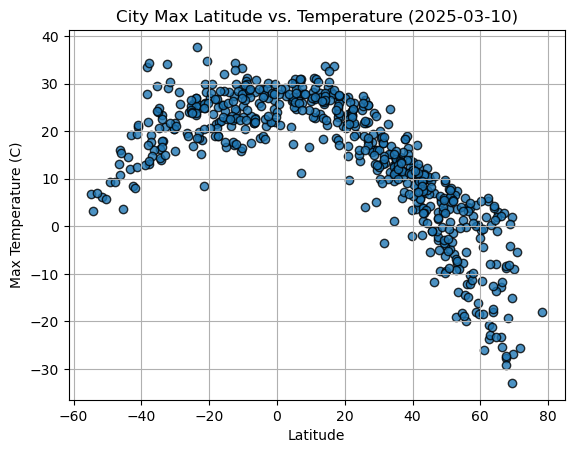

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="cities")


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)                                                                   

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

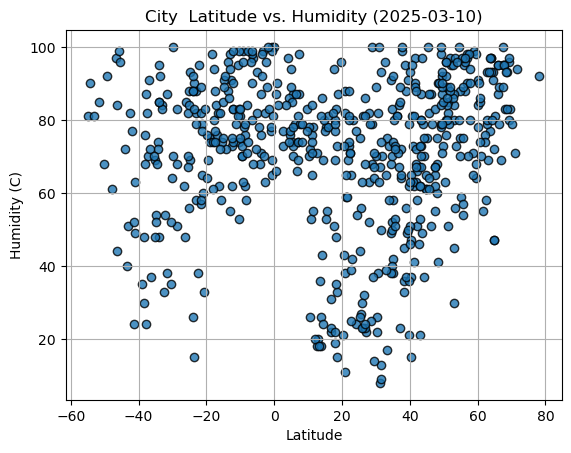

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)
    

# Incorporate the other graph properties
plt.title("City  Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (C)")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

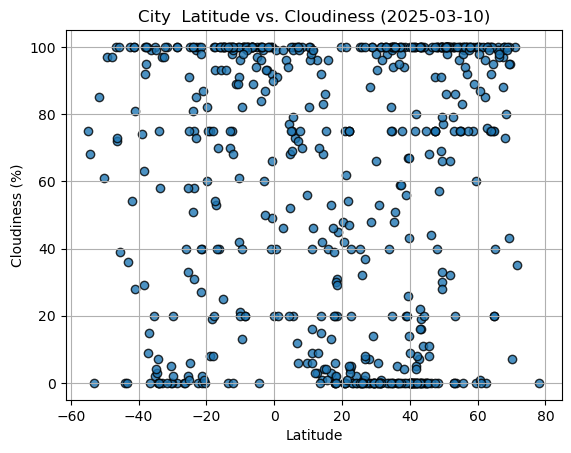

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City  Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

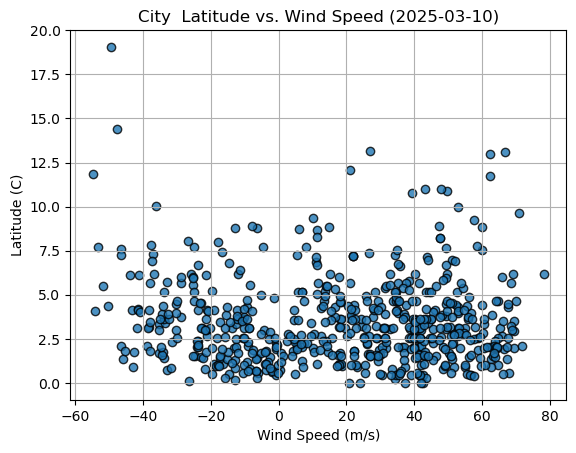

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City  Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Latitude (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"Latitude vs {title}")
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,&q=iqaluit,63.7506,-68.5145,-17.95,77,75,2.06,CA,1741659981
1,&q=olonkinbyen,70.9221,-8.7187,-5.40,71,100,9.63,SJ,1741659982
2,&q=coahuayana de hidalgo,18.7000,-103.6583,22.99,87,45,0.95,MX,1741659984
3,&q=khandyga,62.6667,135.6000,-20.79,79,100,1.38,RU,1741659985
4,&q=lotoshino,56.2267,35.6414,4.07,88,100,4.90,RU,1741659986


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,&q=margaret river,-33.9500,115.0667,23.40,48,0,1.44,AU,1741659987
8,&q=kirakira,-10.4544,161.9205,29.02,74,61,3.62,SB,1741659991
10,&q=rio verde de mato grosso,-18.9181,-54.8442,23.64,75,8,1.10,BR,1741659993
12,&q=puerto natales,-51.7236,-72.4875,6.15,85,85,5.52,CL,1741659995
13,&q=waitangi,-43.9535,-176.5597,14.60,72,0,6.14,NZ,1741659996


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7805263456088402


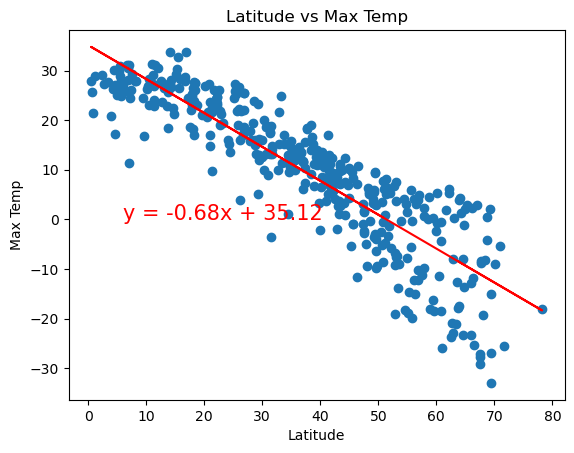

In [29]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,0))

The r^2-value is: 0.3150940322814749


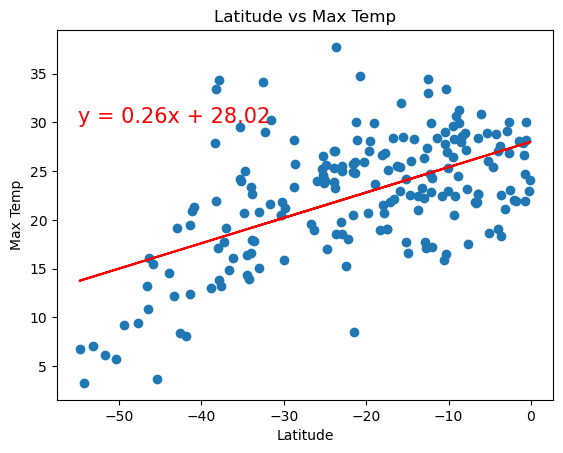

In [30]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.08961819603506457


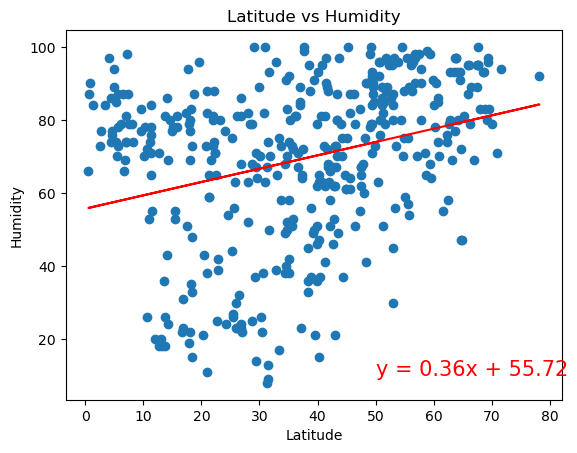

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (50,10))

The r^2-value is: 0.09724407814431726


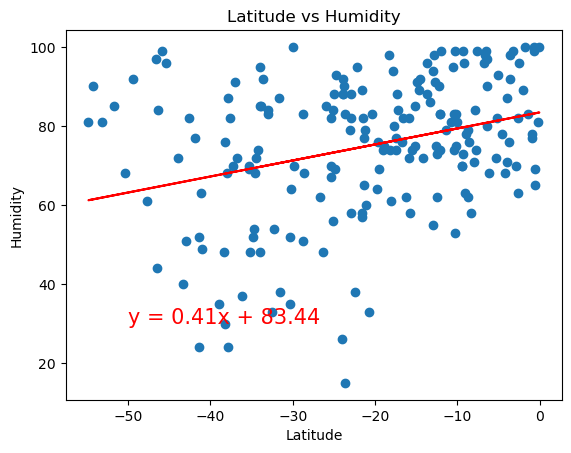

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.06375664655507005


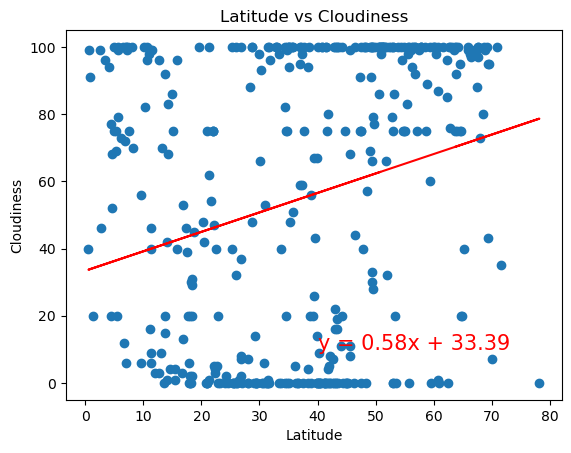

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r^2-value is: 0.07006149518275101


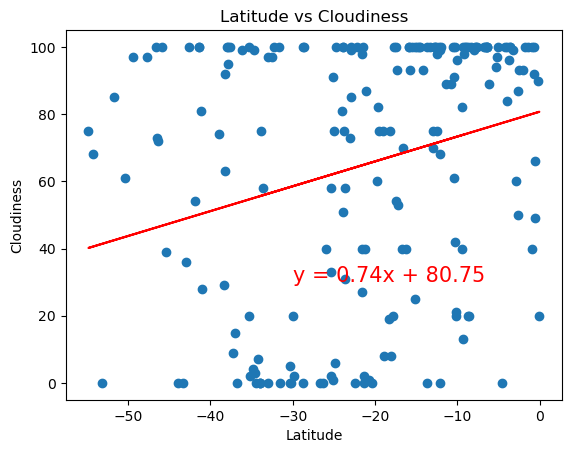

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0003290798744654711


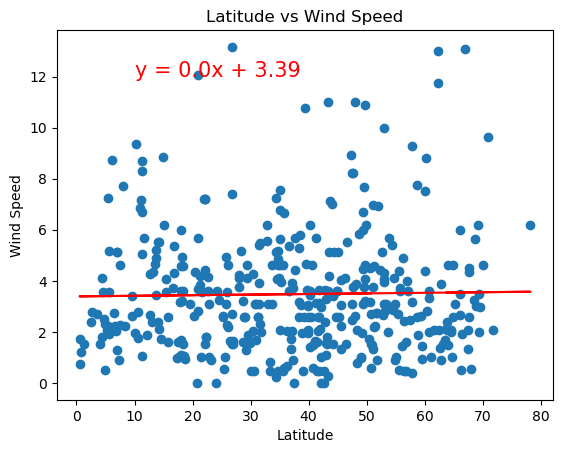

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r^2-value is: 0.15862227501061754


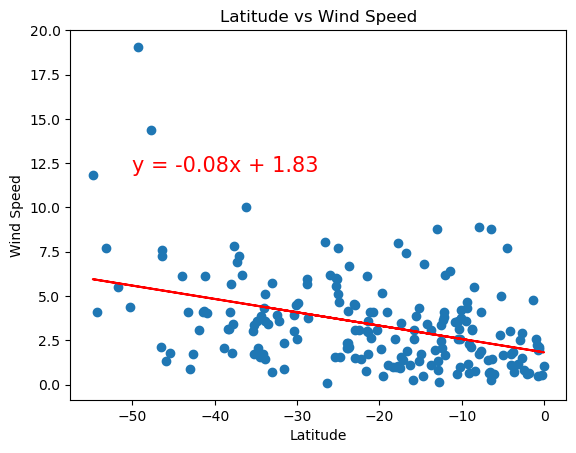

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
Based on the low r^2 values it is shown that there is no significant relationship between the wind speed and latitude. Additionally the difference between the two hempispheres is also not significant.